
--------------
#### *BITTOLO* Raphaël, *TRAN-THANH* Raphaël $\\$
# <center> **MACS207b : Poisson processes** $\\$ The OFDMA protocol </center>



----------
## *Introduction :*


##### **Context**


In the OFDMA communication protocol, we consider allocated resources called subcarriers, which are frequency bins at a certain time slot.
The allocation of several subcarriers for a certain duration builds a subchannel. The number of allocated subcarriers needed to communicate at a rate $C$ depends on how far the user is from the access point of the cell.

Our goal is to compute the probability that the cell is saturated, i.e. that there aren't enough subcarriers available to satisfy all of the users.

##### **Model**


We will model our cell as follows:

- The users will be represented by a Poisson process of intensity measure $\lambda dx$
- There is a percentage $p$ of active users in a time slot
- The access point is located at $(0, 0)$, and the observation window is a circle of radius $R$
- The number of slots needed for a user located at $x$ is:

$$N(x) = ⌈\frac{C}{W \log_2\left(1 + K \|x\|^\gamma \right)}⌉ ~if~  K\|x\|^{-\gamma} > \text{SNR}_{\min}
$$

- It follows that the number of slots per user is bounded by:

$$N_{max} = ⌈\frac{C}{W \log_2\left(1 + SNR_{min} \right)}⌉$$

## *Questions :*

### *Question 1 - Thinning*

The process of active customers is a thinning of a Poisson process, with respect to a fixed parameter $p$, the percentage of active users in a time slot.
We denote $P_0 \sim \mathcal{P}(\lambda dx)$ the initial process, and
$$
P \sim \mathcal{P}(p\lambda dx)  
$$
the thinned process.

### *Question 2 - Active customers*

The intensity measure of $P$ derives from the Lebesgue measure. Therefore, in the whole cell, which we denote $\mathcal{D} = \mathcal{D}(0, R)$, we have:
$$
P(\mathcal{D}) \sim \mathcal{P}(\pi R^2 p \lambda)
$$
Hence, the average number of active users in the cell is:
$$
\mathbb{E}[P(\mathcal{D})] = \pi R^2 p \lambda
$$

### *Question 3 - k subcarriers*

The function $N(x)$ is strictly increasing with respect to $||x||$. Thus we can compute a lower and upper bound on the set $\mathcal{N_n} = \left\{x \in \mathbb{R^2} | N(x) = k\right\} $ for a given $k \le N_{max}$. Suppose that $k \ge 2$, and that we have:

$$ N(x) = \lceil \frac{C}{W \log_2\left(1+\frac{K}{{\lVert x \rVert}^\gamma}\right)} \rceil = k $$



Then, by definition of the operator $\lceil \rceil$, it is equivalent to:

$$ k-1 \lt \frac {C}{W \log_2\left(1+\frac{K}{{\lVert x \rVert}^\gamma}\right)} \leq k $$

$$\Leftrightarrow \frac{C}{W(k)} \le log_2(1+\frac{K}{||x||^{\gamma}}) < \frac{C}{W(k-1)}$$

$$\Leftrightarrow (\frac{K}{2^{\frac{C}{(k-1)W}} - 1})^{\frac{1}{\gamma}} < ||x|| \le (\frac{K}{2^{\frac{C}{kW}} - 1})^{\frac{1}{\gamma}}$$

In the case where $k=1$, we only have to worry about the upper bound, which is:

$$ ||x|| \le (\frac{K}{2^{\frac{C}{W}} - 1})^{\frac{1}{\gamma}}$$

Let us denote, for $k \ge 1$
$$R(k) = (\frac{K}{2^{\frac{C}{kW}} - 1})^{\frac{1}{\gamma}}$$

And $$R(0) = 0$$

We can thus characterize the subset of the cell in which all customers require $k \ge 1$ subcarriers as the region which is lower-bounded by the circles of radii $R(k-1)$ and $R(k)$.

For $k \ge 2$, $\mathcal{R_k}$ is a ring, and for $k=1$, it's a disk!

### *Question 4 - The case where k = 3*

As we did before, we only need to compute the area of the ring $\mathcal{R_3}$, which gives us:

$$\mathcal{A_3} \sim P(\mathcal{R_3}) \sim \mathcal{P}(\pi (R(3)^2 - R(2)^2) p \lambda)$$

### *Question 5 - Kolmogorov-Smirnov test*

##### **Simulation**


First, we define some functions to simulate the thinned Poisson process $P$.  

In [1]:
# import
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import kstest, ks_2samp

In [2]:
# constants
C = 200 * 10**(3)
W = 250 * 10**(3)
K = 10**(6)
gamma = 2.8
R = 300
lbda = 0.01
SNR_min = 0.1
p = 0.01
S_min = 30
S_max = 100

In [3]:
def r(k):
  """
  function which returns r(k)
  arg :
    k (int)
  return :
    r(k) (float)
  """
  if k == 0:
    return 0
  return (K / (2 ** (C/(k*W)) - 1))**(1/gamma)

def N(x):
  """
  function which returns N(x)
  arg :
    x (list[float]) : a vector
  return :
    N(x) (int)

  """
  tmp = C / (W * np.log(1 + K/(np.linalg.norm(x))**(gamma)) / np.log(2))
  return int(math.ceil(tmp))

def P(a = R, b = R, lbda = lbda):
  """
  function which simulates a Poisson process of intensity lambda p dx in [-a, a] * [-b, b]
  arg :
    a (float)
    b (float)
    lbda (float) : lambda
  return :
    l = [lx, ly] (list[list[float]]) : a list l such that (l[0][i], l[1][i]) are the coordinate of the i-th point.
  """
  lx = []
  ly = []
  I = (2*a)*(2*b)*lbda*p
  M = np.random.poisson(I)
  for i in range(0, M):
    lx.append(np.random.uniform(-a, a))
    ly.append(np.random.uniform(-b, b))
  return [lx, ly]

def affichage(l, show_circles = True):
  """
  function which represents a set of points (l) and the r(i)s
  arg :
    l (list[list[float]]) : list l such that (l[0][i], l[1][i]) are the coordinate of the i-th point
  return : None
  """
  lx = l[0]
  ly = l[1]

  plt.figure(figsize=(6, 6))
  plt.scatter(lx, ly, c='blue', alpha=0.5, label = 'active users')

  if show_circles:
    # Ajouter les cercles au graphique
    circle0 = plt.Circle((0, 0), r(1), fill=False, edgecolor='grey', linestyle='--', alpha = 0.5)
    circle1 = plt.Circle((0, 0), r(2), fill=False, edgecolor='red', linestyle='--', label = "Circle of radius r(2)")
    circle2 = plt.Circle((0, 0), r(3), fill=False, edgecolor='orange', linestyle='--', label = "Circle of radius r(3)")
    circle3 = plt.Circle((0, 0), r(4), fill=False, edgecolor='grey', linestyle='--', alpha = 0.5)
    circle4 = plt.Circle((0, 0), r(5), fill=False, edgecolor='grey', linestyle='--', alpha = 0.5)
    circle5 = plt.Circle((0, 0), r(6), fill=False, edgecolor='grey', linestyle='--', alpha = 0.5)


    # Ajouter les cercles à l'axe
    plt.gca().add_artist(circle0)
    plt.gca().add_artist(circle1)
    plt.gca().add_artist(circle2)
    plt.gca().add_artist(circle3)
    plt.gca().add_artist(circle4)
    plt.gca().add_artist(circle5)

  plt.xlim((-R*1.1, R*1.1))
  plt.ylim((-R*1.1, R*1.1))

  plt.axhline(0, color='grey', linewidth=0.8)
  plt.axvline(0, color='grey', linewidth=0.8)

  plt.grid(True, linestyle='--', alpha=0.7)

  plt.gca().set_aspect('equal', adjustable='box')

  plt.title('')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend(loc = 'upper left')

  plt.show()


In [4]:
def A_3(l):
  """
  function which computes the number of points such that N(x) = 3
  arg :
    l (list[list[float]]) : list l such that (l[0][i], l[1][i]) are the coordinate of the i-th point
  return :
    s (int) : the number of points such that N(x) = 3
  """
  lx = l[0]
  ly = l[1]
  s = 0
  for i in range(0, len(lx)):
    if N([lx[i], ly[i]]) == 3:
      s += 1
  return s

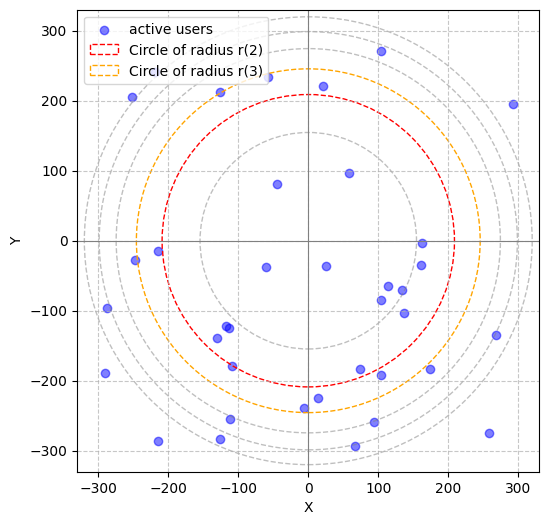

In [5]:
# test
l = P()
affichage(l)
print("A_3 : " + str(A_3(l)))

Now, we can simulate the poisson process n times, and compute an estimation of the distribution of $\mathcal{A}_3$

In [6]:
# test
n_sample = 10**(5)
A_values = []
for i in range(0, n_sample):
  A_values.append(A_3(P()))

A_3 : 7


We compare the estimate distribution of $\mathcal{A}_3$ with the distribution of a Poisson distribution of parameter $p \pi \lambda (R_3^2 - R_2^2)$

In [7]:
ks_statistic, p_value = ks_2samp(A_values, np.random.poisson(p * np.pi * lbda * (r(3)**2 - r(2)**2), size = n_sample))
print("KS statistic : " + str(ks_statistic))
print("p_value : " + str(p_value))

KS statistic : 0.0020100000000000673
p_value : 0.987350430778663


We now denote $$F(\phi) = \sum_{x\in\phi}^{}N(x)$$

We can then reformulate the probability of outage in the OFDMA protocol as finding

$$p_o = \mathbb{P}(F>S)$$
With S the number of available slots

### *Question 6 - Compound distribution*

We can write the whole cell $\mathcal{C}$ as the reunion of the rings $\mathcal{R_1}$ to $\mathcal{R}_{N_{max}}$, which gives us:

$$
\begin{align}
F(\phi) &= \sum_{x\in\phi}^{}N(x) \\
&= \sum_{x\in\phi}^{} \sum_{k = 1}^{N_{max}} k\mathbb{1}_{N(x) = k} \\
&= \sum_{k = 1}^{N_{max}} k (\sum_{x\in\phi}^{}\mathbb{1}_{N(x) = k}) \\
&= \sum_{k = 1}^{N_{max}} k (\int 1_{N(x) = k} 1_{x \in \phi} dP(x))
\end{align}$$

We can thus define:
$$\forall k\in \left [|1, N_{max} |\right ], \zeta_k \overset{\underset{\mathrm{def}}{}}{=} \int 1_{N(x) = k} 1_{x \in \phi} dP(x) $$

We immediatly get that:


$$\zeta_k \overset{\underset{\mathrm{loi}}{}}{=} P(\phi \cap \mathcal{R}_k) \sim \mathcal{P}(p\lambda \mathcal{A}(\phi \cap \mathcal{R_k}))$$


i.e. $\zeta_k$ follows a Poisson distribution of parameter $p\lambda A(\phi \cap \mathcal{R_k})$ (with $A$ designating the area).

Then, for all $k_0 \neq k_1$ and  for all $\phi$, $\phi \cap \mathcal{R}_{k_0}$ and $\phi \cap \mathcal{R}_{k_1}$ are disjoint since the rings are. Hence the $\zeta_k$ are independant.

### *Question 7 - Exponentiation*

Let $\theta > 0$. We have:

$$
\begin{align}
\mathbb{E}[e^{\theta X_{\mu}}] &= \sum_{k = 0}^{\infty} e^{\theta k} \mathbb{P}(X_\mu = k) \\
&= \sum_{k = 0}^{\infty} e^{\theta k} \frac{\mu^k e^{-\mu}}{k!} \\
&= e^{-\mu}e^{\mu e^\theta} \\
&= e^{\mu(e^\theta-1)}
\end{align}
$$

We now want to compute:

$$\underset{\theta > 0}{min}~e^{-K\mu \theta}\mathbb{E}[e^{\theta X_\mu}]
$$

i.e.
$$\underset{\theta > 0}{min}~e^{\mu(e^\theta - K\theta -1)}$$

With a quick analysis of the function, we can easily determine that it reaches its minimum (for $K > 1$) for $\theta = log(K)$, with value
$$e^{\mu(K - Klog(K) - 1)}$$

### *Question 8 - Truncating the Poisson distribution for numerical representation*

From the Markov inequality, we get that:

$$
\forall \theta > 0, P(X_{\mu} \geq K\mu) \leq e^{-K\mu \theta} E \left[ e^{\theta X_{\mu}} \right]
$$

We can take the minimum w.r.t. $\theta$ in the right-hand side of the equation which gives:

$$P(X_{\mu} \geq K\mu) \le e^{\mu(K - Klog(K) - 1)}$$

Finally, we can solve

$$e^{\mu(K - Klog(K) - 1)} \le 10^{-4}$$

$$\Leftrightarrow (K - Klog(K) - 1) \le -\frac{4}{\mu} ln(10) $$

Let's find a numerical solution:






In [8]:
import numpy as np
from matplotlib import pyplot as plt

def K_mu(mu):
  """
  function which computes K_mu
  arg :
    mu (float)
  return :
    K_mu (int) : the smallest i > 0 such that P(X_mu > K_mu * mu) < 10^(-4)
  """

  def f_mu(K): # Function to study
    return K - 1 - K*np.log(K) + 1/mu * np.log(10)*4

  K = 1 # We will always chose an integer value K > 1, it's easier this way
  while f_mu(K) > 0:
    K += 1
  return K

# test
mu = 1
print("K_mu(" + str(mu) + ") : " + str(K_mu(mu)))

K_mu(1) : 8


### *Question 9*

In [9]:
# computation of N_max
N_max = int(np.ceil(C/(W*np.log(1 + SNR_min)/np.log(2))))
print("N_max : " + str(N_max))

N_max : 6


In [10]:
def mean_zeta(k):
  """
  function which computes the mean of zeta(k)
  arg :
    k (int)
  return :
    mean(zeta_k) (float)
  """
  return p * lbda * np.pi * (r(k)**2 - r(k-1)**2)

for k in range(1, N_max + 1):
  print("Mean of zeta(" + str(k) + ") : " + str(mean_zeta(k)))

Mean of zeta(1) : 7.512920966385436
Mean of zeta(2) : 6.189769948861467
Mean of zeta(3) : 5.241304921074711
Mean of zeta(4) : 4.719235048344721
Mean of zeta(5) : 4.370784606875388
Mean of zeta(6) : 4.114347419853829


In [11]:
def size(k):
  """
  function which computes the size of zeta_k
  arg :
    k (int)
  return
    K_mu * mu (float)
  """
  mu = mean_zeta(k)
  return K_mu(mu) * mu

In [12]:
size_l = [size(k) for k in range(1, N_max + 1)]
print("size_l : " + str(size_l))
print("max(size_l) : " + str(max(size_l)))

K_dim = int(np.ceil(max(size_l)))

size_l : [22.538762899156307, 24.759079795445867, 20.965219684298845, 18.876940193378886, 17.48313842750155, 16.457389679415314]
max(size_l) : 24.759079795445867


In [13]:
def zeta_distrib(k):
  """
  function which returns the distribution of zeta_k truncated at K_dim
  arg :
    k (int)
  return :
    zeta_l (list[float]) : distribution of zeta(k) truncated at K_dim
  """
  zeta_l = []
  mu = mean_zeta(k)
  for j in range(0, K_dim):
    zeta_l.append(np.exp(-mu) * mu**j / math.factorial(j))
  return zeta_l

zeta_distrib_l = [zeta_distrib(k) for k in range(1, N_max + 1)]

In [14]:
def k_zeta_distrib(k):
  """
  function which returns the distribution of k*zeta_k
  arg :
    k (int)
  return :
    k_zeta_l (list[float]) : distribution of k*zeta(k)
  """
  zeta_l = zeta_distrib(k)
  k_zeta_l = []
  for i in range(0, (len(zeta_l)) * k):
    if i % k == 0:
      k_zeta_l.append(zeta_l[i//k])
    else:
      k_zeta_l.append(0)
  return k_zeta_l

k_zeta_distrib_l = [k_zeta_distrib(k) for k in range(1, N_max + 1)]

# test
print("distribution of zeta_1 : " + str(k_zeta_distrib_l[0]))
print("distribution of 4*zeta_4 : " + str(k_zeta_distrib_l[3]))

distribution of zeta_1 : [0.0005459839564810414, 0.004101934313956489, 0.015408754155029784, 0.03858825071906732, 0.0724776194708547, 0.1089037253832579, 0.13636418029156, 0.14635618702520353, 0.137445308257735, 0.1147350820156496, 0.08619956032553264, 0.058873680369354586, 0.03685944230126656, 0.02130169822111229, 0.01143128394178642, 0.005725488853263489, 0.0026884465780305862, 0.0011881227448878333, 0.0004959040155948454, 0.0001960888250566971, 7.365999225211727e-05, 2.6352461913081933e-05, 8.999271073757587e-06, 2.93960053618345e-06, 9.202077708787712e-07]
distribution of 4*zeta_4 : [0.008922000838055479, 0, 0, 0, 0.04210501905631239, 0, 0, 0, 0.09935174082088591, 0, 0, 0, 0.15628807246532858, 0, 0, 0, 0.18439003730415457, 0, 0, 0, 0.17403598532227138, 0, 0, 0, 0.13688612026767843, 0, 0, 0, 0.09228539662845124, 0, 0, 0, 0.05443955977742262, 0, 0, 0, 0.02854589761311893, 0, 0, 0, 0.013471480050229077, 0, 0, 0, 0.005779552800556162, 0, 0, 0, 0.0022729223450119605, 0, 0, 0, 0.00082511

**Justification for the convolution product:**

We're computing the distribution of $\sum_{k = 1}^{N_{max}} k\zeta_k$. The $k\zeta_k$ are independant, thus we only need to compute the convolution product of all the density functions.

In [15]:
def F_distrib():
  """
  function which the distribution of F
  arg :
    None
  return :
    F (list[float]) : density of F
  """
  k_zeta_distrib_l = [k_zeta_distrib(k) for k in range(1, N_max + 1)]
  F = k_zeta_distrib_l[0]
  for i in range(1, N_max):
    F_tmp = np.convolve(F, k_zeta_distrib_l[i])
    F = F_tmp
  return F

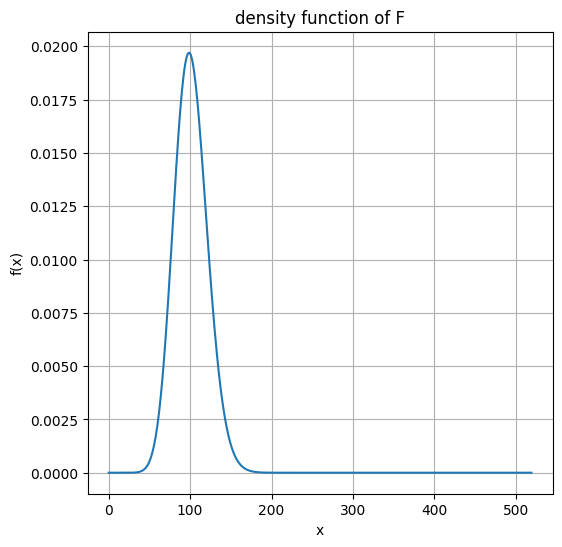

In [16]:
# representation of f
plt.figure(figsize=(6, 6))
plt.plot(F_distrib(), label = "f")
plt.title("density function of F")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

plt.show()

### *Question 10*

In [17]:
def S(outage_proba_lim = 0.01):
  """
  function which computes S for a given outage probability
  arg :
    outage_proba_lim (float)
  return :
    s (int) : the smallest s such that P(F>S) < outage_proba_lim
  """
  F_distrib_l = F_distrib()
  s = 1
  while sum(F_distrib_l[:s]) < 1 - outage_proba_lim:
    s += 1
  return s

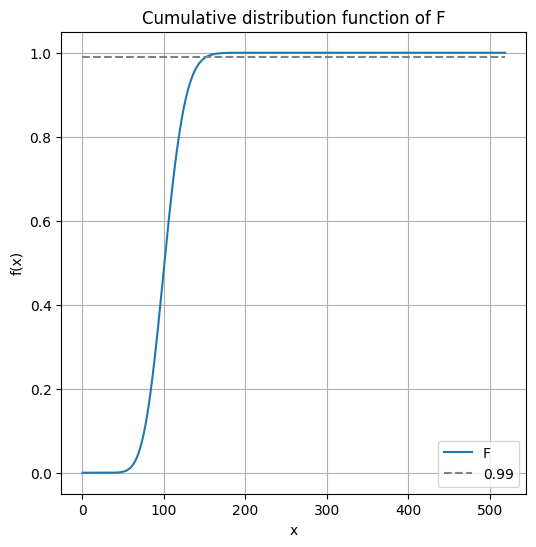

In [18]:
# representation of f
plt.figure(figsize=(6, 6))
f_density = F_distrib()
plt.plot([sum(f_density[:k]) for k in range(0, len(f_density))], label = "F")
plt.plot([1 - 0.01 for k in range(0, len(f_density))], label = "0.99", linestyle = '--', c = 'grey')
plt.title("Cumulative distribution function of F")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.show()

In [19]:
print("S value for an outage probability lower than 0.01 : " + str(S()))

S value for an outage probability lower than 0.01 : 153


We can conclude that we need around 150 subcarriers to ensure that the outage probability is less than 1%.